In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans

## Data Preprocessing

In [521]:
# Loading the sales_dataset
sales_data = pd.read_csv('sales_dataset.csv')

In [522]:
# Making a copy of sales_dataset for analysis
sales_data2 = sales_data.copy()

In [523]:
# Viewing the data
sales_data2.head()

,order_date,order_number,customer_id,customer_name,zipcode,city,state_id,state_name,product_code,product_name,category,unit_price,unit_profit,quantity,revenue,profit,discount_percentage,discount_amount,lead_time_weeks
0,2019-11-13,Ord-3255406,cust-00004673,Ariana Nixon,32162,The Villages,FL,Florida,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,3,78.77,27.57,0.0,0.0,2
1,2016-04-06,Ord-6058810,cust-00038703,Mohammad Esparza,80123,Littleton,CO,Colorado,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,1,26.26,9.19,0.0,0.0,2
2,2019-08-15,Ord-1857958,cust-00106675,Jada Porter,55433,Minneapolis,MN,Minnesota,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,4,105.02,36.76,0.0,0.0,2
3,2019-10-01,Ord-8598538,cust-00188381,Ari Mcgrath,36201,Anniston,AL,Alabama,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,3,78.77,27.57,0.0,0.0,2
4,2016-07-24,Ord-3416282,cust-00213804,Kaitlynn Watkins,46143,Greenwood,IN,Indiana,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,4,105.02,36.76,0.0,0.0,2


In [524]:
# Checking datatypes of each column
sales_data2.dtypes

order_date              object
order_number            object
customer_id             object
customer_name           object
zipcode                  int64
city                    object
state_id                object
state_name              object
product_code            object
product_name            object
category                object
unit_price             float64
unit_profit            float64
quantity                 int64
revenue                float64
profit                 float64
discount_percentage    float64
discount_amount        float64
lead_time_weeks          int64
dtype: object

In [525]:
# Number of rows and columns (x and y axis)
sales_data2.shape

(120000, 19)

In [526]:
# Checking for missing values
sales_data2.isnull().sum()

order_date             0
order_number           0
customer_id            0
customer_name          0
zipcode                0
city                   0
state_id               0
state_name             0
product_code           0
product_name           0
category               0
unit_price             0
unit_profit            0
quantity               0
revenue                0
profit                 0
discount_percentage    0
discount_amount        0
lead_time_weeks        0
dtype: int64

In [527]:
# Converting order_date column to datetime
sales_data2['order_date'] = pd.to_datetime(sales_data2['order_date'])

sales_data2.dtypes

order_date             datetime64[ns]
order_number                   object
customer_id                    object
customer_name                  object
zipcode                         int64
city                           object
state_id                       object
state_name                     object
product_code                   object
product_name                   object
category                       object
unit_price                    float64
unit_profit                   float64
quantity                        int64
revenue                       float64
profit                        float64
discount_percentage           float64
discount_amount               float64
lead_time_weeks                 int64
dtype: object

In [528]:
# Checking basic statistics of the dataset
sales_data2.describe()

,zipcode,unit_price,unit_profit,quantity,revenue,profit,discount_percentage,discount_amount,lead_time_weeks
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,52900.644142,30.881986,12.177759,2.494700,75.143118,28.488434,0.024401,1.888474,1.891317
std,30931.138697,7.629023,3.554572,1.117407,39.631622,16.538022,0.058018,5.170910,1.287887
min,602.000000,11.920000,4.170000,1.000000,9.530000,1.790000,0.000000,0.000000,0.000000
25%,27910.000000,26.440000,9.770000,1.000000,38.360000,14.790000,0.000000,0.000000,1.000000
50%,49301.000000,30.970000,11.900000,2.000000,71.420000,25.490000,0.000000,0.000000,2.000000
75%,83445.000000,36.340000,14.920000,3.000000,104.720000,38.660000,0.000000,0.000000,3.000000
max,99801.000000,47.490000,21.270000,4.000000,189.950000,85.090000,0.200000,37.990000,4.000000


In [529]:
# Checking the first few rows of the sales_data2 dataset after preprocessing
sales_data2.head()

,order_date,order_number,customer_id,customer_name,zipcode,city,state_id,state_name,product_code,product_name,category,unit_price,unit_profit,quantity,revenue,profit,discount_percentage,discount_amount,lead_time_weeks
0,2019-11-13,Ord-3255406,cust-00004673,Ariana Nixon,32162,The Villages,FL,Florida,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,3,78.77,27.57,0.0,0.0,2
1,2016-04-06,Ord-6058810,cust-00038703,Mohammad Esparza,80123,Littleton,CO,Colorado,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,1,26.26,9.19,0.0,0.0,2
2,2019-08-15,Ord-1857958,cust-00106675,Jada Porter,55433,Minneapolis,MN,Minnesota,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,4,105.02,36.76,0.0,0.0,2
3,2019-10-01,Ord-8598538,cust-00188381,Ari Mcgrath,36201,Anniston,AL,Alabama,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,3,78.77,27.57,0.0,0.0,2
4,2016-07-24,Ord-3416282,cust-00213804,Kaitlynn Watkins,46143,Greenwood,IN,Indiana,Nut-48306,Macadamia Style 5 Raw 11.34kg Bag,Nuts,26.26,9.19,4,105.02,36.76,0.0,0.0,2


## Exploratory Data Analysis

I'm exploring the dataset further to gain more insights and I'll do sales trends, customer distribution and product distribution to determine to optimal location for a second warehouse.

In [530]:
# Sales trends over the years
sales_data2['year'] = sales_data2['order_date'].dt.year
yearly_sales = sales_data2.groupby('year')['revenue'].sum()

In [531]:
# Print out the total revenue for each year separately
for year, revenue in yearly_sales.items():
    print(f'Total Revenue for {year}: ${revenue:.0f}')

Total Revenue for 2016: $479933
Total Revenue for 2017: $785662
Total Revenue for 2018: $1330171
Total Revenue for 2019: $2321759
Total Revenue for 2020: $4099649


In [532]:
# Customer distribution by state
state_customers = sales_data2.groupby('state_name')['customer_id'].nunique()

In [533]:
# Product distribution by category
category_counts = sales_data2['category'].value_counts()

print(category_counts)

Misc      43000
Nuts      29127
Fruit     23907
Seeds     12483
Flours     6357
Cereal     5126
Name: category, dtype: int64


The number of unique customers is: 9663


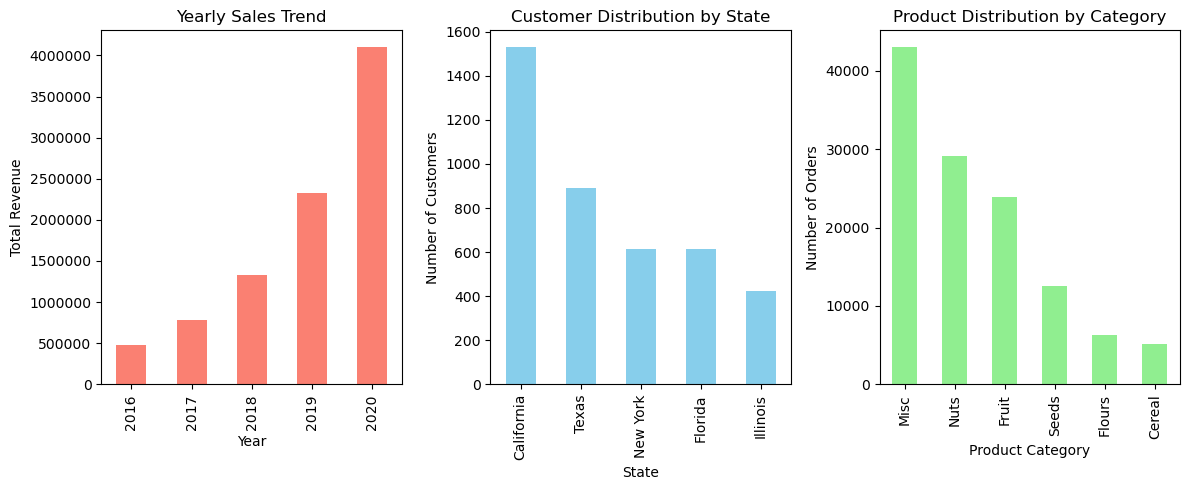

In [534]:
# Getting the top 5 states by customer distribution
top_states = state_customers.sort_values(ascending=False).head(5)

# Total number of unique customers in all 5 states

unique_customers = sales_data2['customer_id'].nunique()

print(f'The number of unique customers is: {unique_customers}')

# Visualizing the results 
plt.figure(figsize=(12, 5))

plt.subplot(131)
ax = yearly_sales.plot(kind='bar', color='salmon')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Sales Trend')

# Formatting Y-axis ticks as integers for revenue
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

plt.subplot(132)
top_states.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by State')

plt.subplot(133)
category_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.title('Product Distribution by Category')

plt.tight_layout()
plt.show()

In [535]:
# Filter the data for the top 5 states
top_states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']
filtered_data = sales_data2[sales_data2['state_name'].isin(top_states)]

# Calculate the overall revenue for each state
state_revenue = filtered_data.groupby('state_name')['revenue'].sum().reset_index()

# Sort the states by revenue in descending order
state_revenue = state_revenue.sort_values(by='revenue', ascending=False)

# Print the overall revenue for the top 5 states
print(state_revenue)

   state_name     revenue
0  California  1434269.27
4       Texas   833455.92
3    New York   594045.55
1     Florida   562208.19
2    Illinois   390226.54


In [536]:
# Filter the data for the top 5 states
top_states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']
filtered_data = sales_data2[sales_data2['state_name'].isin(top_states)]

# Calculate the overall profit for each state
state_profit = filtered_data.groupby('state_name')['profit'].sum().reset_index()

# Sort the states by profit in descending order
state_profit = state_profit.sort_values(by='profit', ascending=False)

# Print the overall profit for the top 5 states
print(state_profit)

   state_name     profit
0  California  543800.63
4       Texas  314806.22
3    New York  225210.31
1     Florida  212110.04
2    Illinois  147963.95


In [537]:
# Filter the sales data for California
california_sales = sales_data2[sales_data2['state_name'] == 'California']

# Group the data by product category and count the number of orders in each category
category_counts = california_sales.groupby('category')['order_number'].count()

# Find the most popular product category
most_popular_category = category_counts.idxmax()
num_orders_most_popular = category_counts.max()

print(f"The most popular product category in California is '{most_popular_category}' with {num_orders_most_popular} orders.")

The most popular product category in California is 'Misc' with 6765 orders.


In [538]:
# Customer distribution for all states
print(state_customers)

state_name
Alabama                   98
Alaska                    12
Arizona                  224
Arkansas                  58
California              1530
Colorado                 181
Connecticut              101
Delaware                  35
District of Columbia      23
Florida                  613
Georgia                  313
Hawaii                    60
Idaho                     45
Illinois                 425
Indiana                  184
Iowa                      59
Kansas                    49
Kentucky                 102
Louisiana                116
Maine                     20
Maryland                 199
Massachusetts            165
Michigan                 269
Minnesota                145
Mississippi               61
Missouri                 134
Montana                   20
Nebraska                  39
Nevada                    99
New Hampshire             25
New Jersey               260
New Mexico                72
New York                 615
North Carolina           285
Nor

In [539]:
# Customer distribution for top 5 states
print(top_states)

['California', 'Texas', 'New York', 'Florida', 'Illinois']


## Geospatial Analysis
Determing the optimal warehouse location by performing a geospatial analysis by visualizing customer distribution on a map. 

In [540]:
# Customer distribution data for Top 5 states
state_customers = pd.Series({'California': 1530, 'Texas': 892, 'New York': 615, 'Florida': 613, 'Illinois': 425})

# Customer distribution data for all states
state_customers2 = pd.Series({'Alabama': 98, 'Alaska': 12, 'Arizona': 224, 'Arkansas': 58, 'California': 1530, 'Colorado': 181, 'Connecticut': 101, 'Delaware': 35, 'District of Columbia': 23, 'Florida': 613, 'Georgia': 313, 'Hawaii': 60, 'Idaho': 45, 'Illinois': 425, 'Indiana': 184, 'Iowa': 59, 'Kansas': 49, 'Kentucky': 102, 'Louisiana': 116, 'Maine': 20, 'Maryland': 199, 'Massachusetts': 165, 'Michigan': 269, 'Minnesota': 145, 'Mississippi': 61, 'Missouri': 134, 'Montana': 20, 'Nebraska': 39, 'Nevada': 99, 'New Hampshire': 25, 'New Jersey': 260, 'New Mexico': 72, 'New York': 615, 'North Carolina': 285, 'North Dakota': 7, 'Ohio': 354, 'Oklahoma': 74, 'Oregon': 121, 'Pennsylvania': 333, 'Puerto Rico': 164, 'Rhode Island': 31, 'South Carolina': 129, 'South Dakota': 15, 'Tennessee': 186, 'Texas': 892, 'Utah': 93, 'Vermont': 1, 'Virginia': 252, 'Washington': 191, 'West Virginia': 30, 'Wisconsin': 142, 'Wyoming': 12})

In [541]:
# Downloaded a shapefile to show customer distribution for only Top 5 States
us_states = gpd.read_file('ne_110m_admin_1_states_provinces.shp')

print(us_states.head())

           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1       Montana   
2  http://en.wikipedia.org/wiki/North_Dakota     US        1  North Dakota   
3        http://en.wikipedia.org/wiki/Hawaii     US        8        Hawaii   
4         http://en.wikipedia.org/wiki/Idaho     US        1         Idaho   

    name_alt  ...  FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT FCLASS_NL  \
0   MN|Minn.  ...        NaN       NaN       NaN       NaN    

In [542]:
# Filter the GeoDataFrame to include only Top 5 U.S. states based on customer distribution
us_states = us_states[us_states['name'].isin(state_customers.index)]

# Filter the GeoDataFrame to include all U.S. states
us_states2 = us_states[us_states['name'].isin(state_customers2.index)]

# Print the columns of the filtered GeoDataFrame
print(us_states)

            featurecla  scalerank adm1_code  diss_me iso_3166_2  \
7   Admin-1 scale rank          2  USA-3521     3521      US-CA   
22  Admin-1 scale rank          2  USA-3536     3536      US-TX   
29  Admin-1 scale rank          2  USA-3542     3542      US-FL   
33  Admin-1 scale rank          2  USA-3546     3546      US-IL   
46  Admin-1 scale rank          2  USA-3559     3559      US-NY   

                                  wikipedia iso_a2  adm0_sr        name  \
7   http://en.wikipedia.org/wiki/California     US        8  California   
22       http://en.wikipedia.org/wiki/Texas     US        4       Texas   
29     http://en.wikipedia.org/wiki/Florida     US        5     Florida   
33    http://en.wikipedia.org/wiki/Illinois     US        1    Illinois   
46    http://en.wikipedia.org/wiki/New_York     US        3    New York   

     name_alt  ...  FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT FCLASS_NL  \
7   CA|Calif.  ...        NaN       NaN       NaN       NaN       NaN   


In [543]:
# Merge customer distribution data with state shapefile for Top 5 states
state_customers_df = pd.DataFrame({'state_name': state_customers.index, 'num_customers': state_customers.values})
merged_states = us_states.set_index('name').join(state_customers_df.set_index('state_name'))

# Merge customer distribution data with state shapefile for all states for clustering analysis
state_customers_df2 = pd.DataFrame({'state_name': state_customers2.index, 'num_customers': state_customers2.values})
merged_states2 = us_states2.set_index('name').join(state_customers_df2.set_index('state_name'))

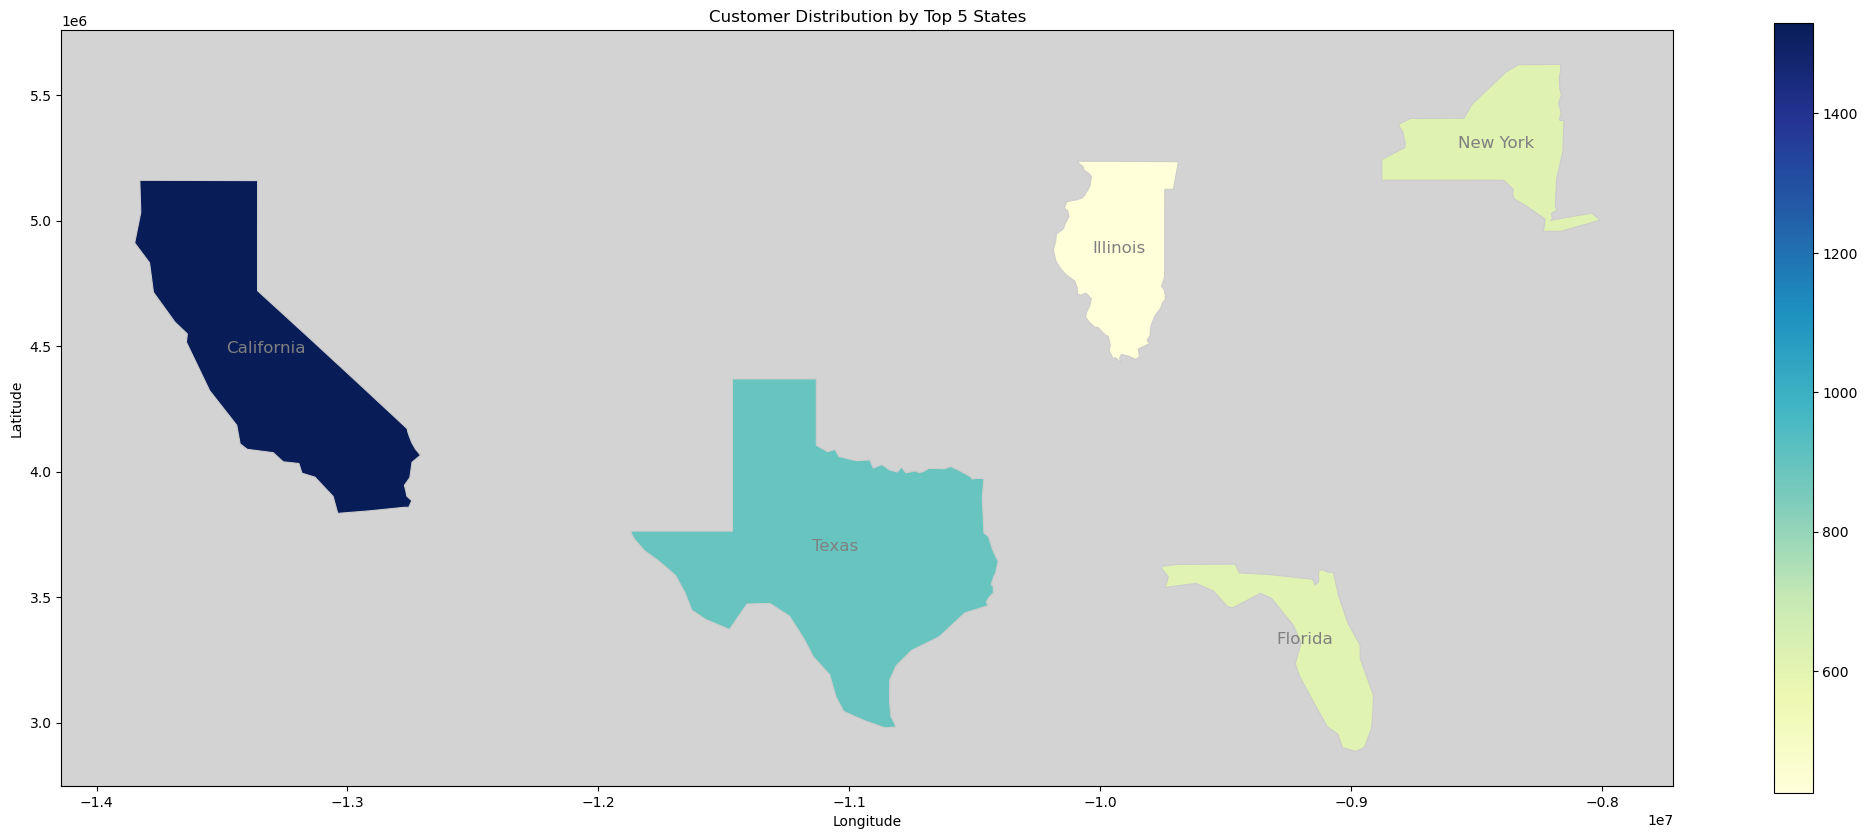

In [544]:
# Creating a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(26, 10))

# To re-project the geometrics to a projected Coordinate Reference System
merged_states = merged_states.to_crs(epsg=3857) 

# Setting custom colors for states and background
state_color = 'lightblue'  # Custom color for states
background_color = 'lightgray'  # Setting background color

# Plotting a map of customer distribution with custom colors
ax.set_facecolor(background_color)  # Setting background color
merged_states.plot(column='num_customers', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Setting labels for x and y axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adding state names as labels on the map
for x, y, label in zip(merged_states.geometry.centroid.x, merged_states.geometry.centroid.y, merged_states.index):
    ax.text(x, y, label, fontsize=12, ha='center', va='center', color='gray')

# Setting the title
ax.set_title('Customer Distribution by Top 5 States')

plt.show()

## Clustering Analysis


In [545]:
# Selecting relevant features for clustering
X = merged_states2[['num_customers']]

# Determining the optimal number of clusters (k)
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
    inertia.append(kmeans.inertia_)

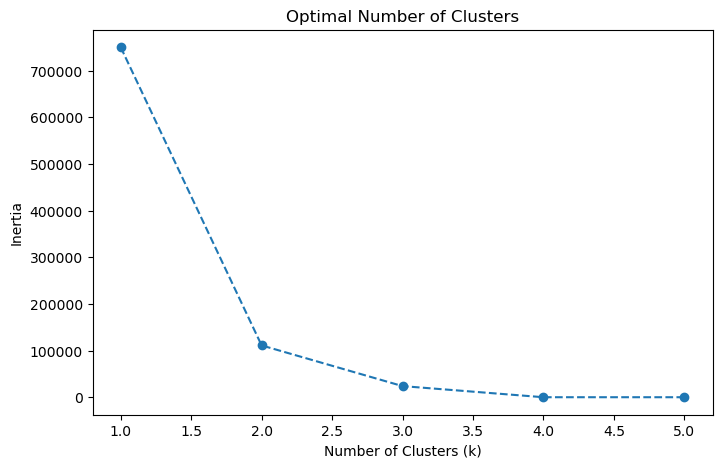

In [546]:
# Elbow method to find the optimal k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Optimal Number of Clusters')
plt.show()

In [547]:
# Based on the elbow method, I chose an optimal k value k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
merged_states2['cluster'] = kmeans.labels_

# View the cluster assignments for each state
cluster_assignments = pd.DataFrame({'State': merged_states2.index, 'Cluster': kmeans.labels_})

# Print the cluster assignments
print(cluster_assignments)

        State  Cluster
0  California        1
1       Texas        2
2     Florida        0
3    Illinois        3
4    New York        0


In [548]:
# Grouping the DataFrame by cluster and list the states in each cluster
clustered_states = cluster_assignments.groupby('Cluster')['State'].apply(list)

# Print the states in each cluster
for cluster, states in clustered_states.items():
    print(f'Cluster {cluster}: {", ".join(states)}')

Cluster 0: Florida, New York
Cluster 1: California
Cluster 2: Texas
Cluster 3: Illinois
